In [6]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [7]:
full_data = pd.read_csv('/kaggle/input/cern-electron-collision-data/dielectron.csv')
predict = full_data[full_data['M'].isnull()]
learn = full_data.drop(index=predict.index)

y = learn['M']
X = learn.drop(columns=['M','Run','Event'])
X_predict = predict.drop(columns=['M','Run','Event'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [ ]:
RFR = RandomForestRegressor(n_jobs=2, random_state=42)
RFR.fit(X_train,y_train)
RFR_test = RFR.predict(X_test)
RFR_predict = RFR.predict(X_predict)

GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(X_train,y_train)
GBR_test = GBR.predict(X_test)
GBR_predict = GBR.predict(X_predict)

NNR = Sequential()
NNR.add(Dense(32, input_shape=(X.shape[1],)))
NNR.add(LeakyReLU())
for size in [16, 16, 8, 1]:
    NNR.add(Dense(size))
    NNR.add(LeakyReLU())
NNR.compile(loss='mse', optimizer=Adam(0.001))
NNR.fit(X_train,y_train, batch_size=256, epochs=500, validation_data=(X_test,y_test), verbose=0, callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)])
NNR_test = NNR.predict(X_test)
NNR_predict = NNR.predict(X_predict)

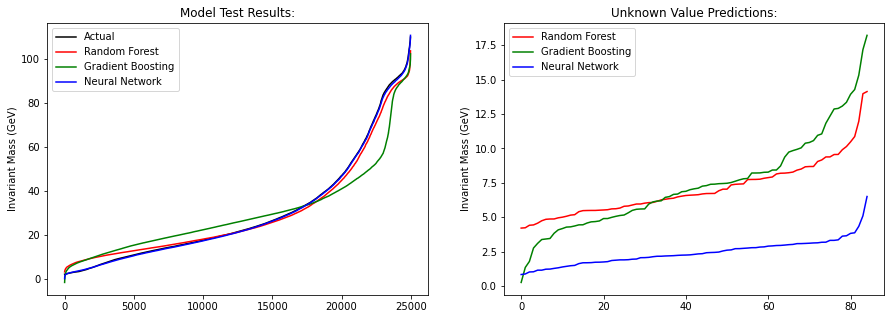

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(np.arange(0,len(y_test)),sorted(y_test), c='k', label='Actual')
axs[0].plot(np.arange(0,len(y_test)),sorted(RFR_test), c='r', label='Random Forest')
axs[0].plot(np.arange(0,len(y_test)),sorted(GBR_test), c='g', label='Gradient Boosting')
axs[0].plot(np.arange(0,len(y_test)),sorted(NNR_test), c='b', label='Neural Network')
axs[0].set_title('Model Test Results:')
axs[0].set_ylabel('Invariant Mass (GeV)')
axs[0].legend(loc='best')
axs[1].plot(np.arange(0,len(X_predict)),sorted(RFR_predict), c='r', label='Random Forest')
axs[1].plot(np.arange(0,len(X_predict)),sorted(GBR_predict), c='g', label='Gradient Boosting')
axs[1].plot(np.arange(0,len(X_predict)),sorted(NNR_predict), c='b', label='Neural Network')
axs[1].set_title('Unknown Value Predictions:')
axs[1].set_ylabel('Invariant Mass (GeV)')
axs[1].legend(loc='best')
plt.show()